In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

import torch.nn as nn

import mlflow
import mlflow.pytorch

In [5]:
ticker = yf.Ticker('AAPL')

In [6]:
data = ticker.history(period='max')

In [7]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0


In [8]:
data_cut = data[['Close']]

In [9]:
data_cut

,Close
Date,
1980-12-12 00:00:00-05:00,0.098597
1980-12-15 00:00:00-05:00,0.093453
1980-12-16 00:00:00-05:00,0.086594
1980-12-17 00:00:00-05:00,0.088737
1980-12-18 00:00:00-05:00,0.091310
...,...
2025-05-13 00:00:00-04:00,212.929993
2025-05-14 00:00:00-04:00,212.330002
2025-05-15 00:00:00-04:00,211.449997


In [10]:
data_cut.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11199 entries, 1980-12-12 00:00:00-05:00 to 2025-05-19 00:00:00-04:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   11199 non-null  float64
dtypes: float64(1)
memory usage: 175.0 KB


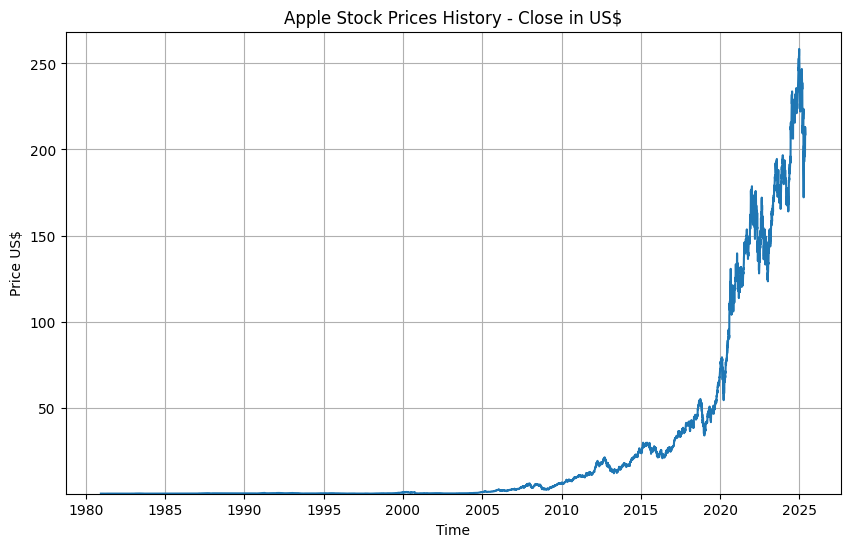

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.ylim(ymin=data['Close'].min(), ymax=data['Close'].max()+10)
plt.title('Apple Stock Prices History - Close in US$')
plt.xlabel('Time')
plt.ylabel('Price US$')
plt.grid()
plt.show()


In [12]:
import copy

def prepare_dataframe(df, n_steps):
    df = copy.deepcopy(df)
    
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace = True)

    return df

In [13]:
data_final = prepare_dataframe(data_cut, 7)


In [14]:
data_final.head(10)

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1980-12-23 00:00:00-05:00,0.105885,0.101597,0.096882,0.091310,0.088737,0.086594,0.093453,0.098597
1980-12-24 00:00:00-05:00,0.111457,0.105885,0.101597,0.096882,0.091310,0.088737,0.086594,0.093453
1980-12-26 00:00:00-05:00,0.121745,0.111457,0.105885,0.101597,0.096882,0.091310,0.088737,0.086594
1980-12-29 00:00:00-05:00,0.123460,0.121745,0.111457,0.105885,0.101597,0.096882,0.091310,0.088737
1980-12-30 00:00:00-05:00,0.120460,0.123460,0.121745,0.111457,0.105885,0.101597,0.096882,0.091310
1980-12-31 00:00:00-05:00,0.117030,0.120460,0.123460,0.121745,0.111457,0.105885,0.101597,0.096882
1981-01-02 00:00:00-05:00,0.118316,0.117030,0.120460,0.123460,0.121745,0.111457,0.105885,0.101597
1981-01-05 00:00:00-05:00,0.115744,0.118316,0.117030,0.120460,0.123460,0.121745,0.111457,0.105885
1981-01-06 00:00:00-05:00,0.110600,0.115744,0.118316,0.117030,0.120460,0.123460,0.121745,0.111457


In [15]:
data_final.tail()

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2025-05-13 00:00:00-04:00,212.929993,210.789993,198.270004,197.231369,195.992981,198.250015,198.629532,205.081070
2025-05-14 00:00:00-04:00,212.330002,212.929993,210.789993,198.270004,197.231369,195.992981,198.250015,198.629532
2025-05-15 00:00:00-04:00,211.449997,212.330002,212.929993,210.789993,198.270004,197.231369,195.992981,198.250015
2025-05-16 00:00:00-04:00,211.259995,211.449997,212.330002,212.929993,210.789993,198.270004,197.231369,195.992981
2025-05-19 00:00:00-04:00,208.779999,211.259995,211.449997,212.330002,212.929993,210.789993,198.270004,197.231369


In [16]:
data_final_np = data_final.to_numpy()
data_final_np

array([[1.05884545e-01, 1.01597220e-01, 9.68820155e-02, ...,
        8.65935460e-02, 9.34527963e-02, 9.85966548e-02],
       [1.11457072e-01, 1.05884545e-01, 1.01597220e-01, ...,
        8.87368098e-02, 8.65935460e-02, 9.34527963e-02],
       [1.21745445e-01, 1.11457072e-01, 1.05884545e-01, ...,
        9.13095251e-02, 8.87368098e-02, 8.65935460e-02],
       ...,
       [2.11449997e+02, 2.12330002e+02, 2.12929993e+02, ...,
        1.97231369e+02, 1.95992981e+02, 1.98250015e+02],
       [2.11259995e+02, 2.11449997e+02, 2.12330002e+02, ...,
        1.98270004e+02, 1.97231369e+02, 1.95992981e+02],
       [2.08779999e+02, 2.11259995e+02, 2.11449997e+02, ...,
        2.10789993e+02, 1.98270004e+02, 1.97231369e+02]])

In [17]:
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

data_final_scaled = scaler.fit_transform(data_final_np)

data_final_scaled

array([[-0.99947236, -0.99950555, -0.99954205, ..., -0.99962169,
        -0.99956859, -0.99952877],
       [-0.99942922, -0.99947236, -0.99950555, ..., -0.9996051 ,
        -0.99962169, -0.99956859],
       [-0.99934958, -0.99942922, -0.99947236, ..., -0.99958518,
        -0.9996051 , -0.99962169],
       ...,
       [ 0.63657793,  0.6433902 ,  0.64803483, ...,  0.52650915,
         0.51692258,  0.53439466],
       [ 0.63510709,  0.63657793,  0.6433902 , ...,  0.5345494 ,
         0.52650915,  0.51692258],
       [ 0.61590903,  0.63510709,  0.63657793, ...,  0.63146873,
         0.5345494 ,  0.52650915]])

In [19]:
X = data_final_scaled[:, 1:]
y = data_final_scaled[:, 0]

In [20]:
y.shape, X.shape

((11192,), (11192, 7))

In [21]:
X = np.flip(X, axis=1)

In [22]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8953, 7), (2239, 7), (8953,), (2239,))

In [23]:
X_train = X_train.reshape(-1,7,1)
X_test = X_test.reshape(-1,7,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8953, 7, 1), (2239, 7, 1), (8953, 1), (2239, 1))

In [24]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([8953, 7, 1]),
 torch.Size([2239, 7, 1]),
 torch.Size([8953, 1]),
 torch.Size([2239, 1]))

In [26]:
from torch.utils.data import Dataset

class TimeSeries(Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, i):
        return self.X[i], self.y[i]

In [27]:
train_dataset = TimeSeries(X_train, y_train)
test_dataset = TimeSeries(X_test, y_test)

In [28]:
from torch.utils.data import DataLoader

batch = 32

train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch, shuffle=False)

In [29]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([32, 7, 1]) torch.Size([32, 1])


In [30]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stack_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stack_layers = num_stack_layers
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_stack_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stack_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stack_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [31]:
input_size = 1
hidden_size = 4
num_stack_layers = 1

model = LSTM(input_size, hidden_size, num_stack_layers)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [32]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:
            avg_loss_across_batches = running_loss / 100
            print(f'Batch {batch_index + 1 }, Loss {avg_loss_across_batches:.3f}')
            running_loss = 0.0
    
    print()


In [33]:
def validade_one_epoch():
    model.eval()
    running_loss = 0.0
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss +=loss.item()

    avg_loss = running_loss / len(test_loader)
    print(f'Val Loss {avg_loss}')
    mlflow.log_metric("val_loss", avg_loss, step=num_epochs)
    print('*' * 20)
    print()

In [34]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [35]:
mlflow.set_tracking_uri('mlruns')
mlflow.set_experiment('Stock_Price_Prediction')

with mlflow.start_run(run_name='lstm_stock_price_prediction'):
    mlflow.log_param('input_size', input_size)
    mlflow.log_param('hidden_size', hidden_size)
    mlflow.log_param('num_stack_layers', num_stack_layers)
    mlflow.log_param('num_epochs', num_epochs)
    mlflow.log_param('learning_rate', learning_rate)

    for epoch in range(num_epochs):
        train_one_epoch()
        validade_one_epoch()
        
    mlflow.pytorch.log_model(model, 'model')


Epoch: 1
Batch 100, Loss 0.296
Batch 200, Loss 0.078

Val Loss 0.03996635951500918
********************

Epoch: 2
Batch 100, Loss 0.027
Batch 200, Loss 0.013

Val Loss 0.008472253818971305
********************

Epoch: 3
Batch 100, Loss 0.006
Batch 200, Loss 0.004

Val Loss 0.004362296139255964
********************

Epoch: 4
Batch 100, Loss 0.003
Batch 200, Loss 0.003

Val Loss 0.0031038468495743084
********************

Epoch: 5
Batch 100, Loss 0.003
Batch 200, Loss 0.002

Val Loss 0.0022871737210412644
********************

Epoch: 6
Batch 100, Loss 0.002
Batch 200, Loss 0.002

Val Loss 0.0016222065169131383
********************

Epoch: 7
Batch 100, Loss 0.001
Batch 200, Loss 0.001

Val Loss 0.0010215640631421202
********************

Epoch: 8
Batch 100, Loss 0.001
Batch 200, Loss 0.001

Val Loss 0.0005139706867339555
********************

Epoch: 9
Batch 100, Loss 0.000
Batch 200, Loss 0.000

Val Loss 0.00029029929463441864
********************

Epoch: 10
Batch 100, Loss 0.000
Batch 20

2025/05/20 15:38:32 WARNING mlflow.utils.requirements_utils: Found torch version (2.2.2+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.2.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Val Loss 0.0002497589995462996
********************



2025/05/20 15:38:41 WARNING mlflow.utils.requirements_utils: Found torch version (2.2.2+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.2.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/05/20 15:38:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/05/20 15:38:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
for epoch in range(num_epochs):
    train_one_epoch()
    validade_one_epoch()

IndentationError: unexpected indent (2294172197.py, line 2)

In [37]:
with torch.no_grad():
    predict = model(X_train.to(device)).to('cpu').numpy()

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error


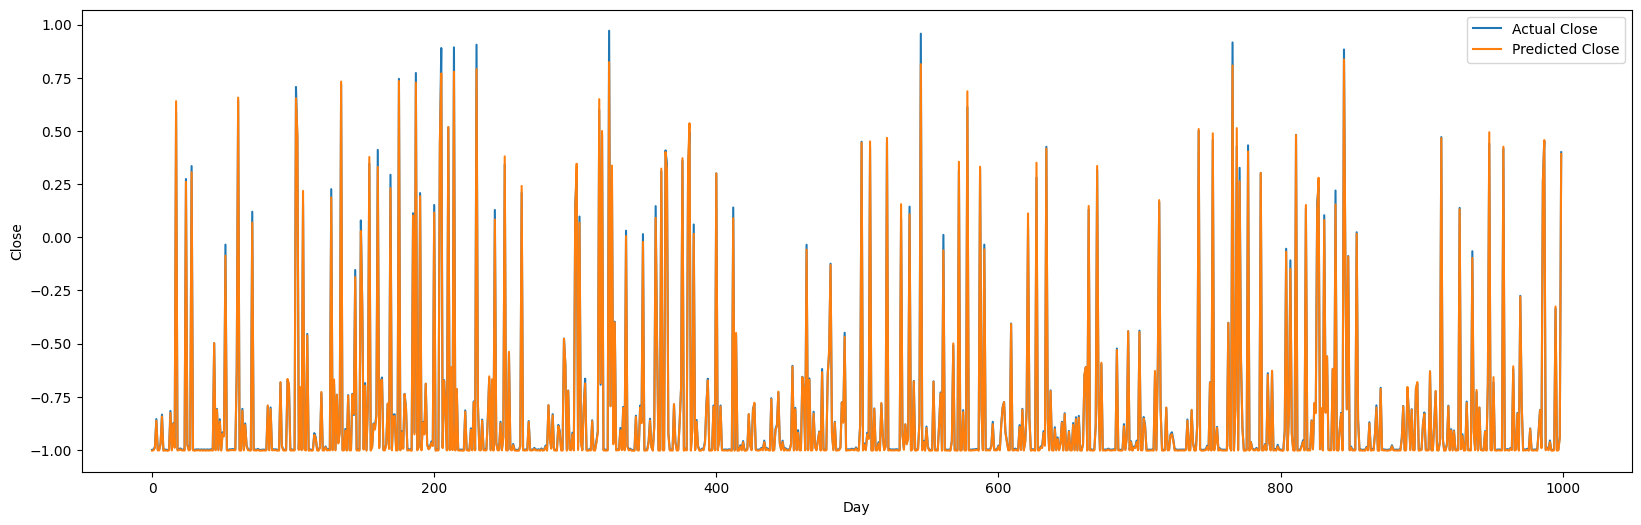

In [39]:
plt.figure(figsize=(20,6))
plt.plot(y_train[:1000], label='Actual Close')
plt.plot(predict[:1000], label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [40]:
train_prediction = predict.flatten()

dummies = np.zeros((X_train.shape[0], 8))
dummies[:,0] = train_prediction
dummies = scaler.inverse_transform(dummies)

train_prediction = copy.deepcopy(dummies[:,0])
train_prediction

array([-0.37359389, -0.1398773 ,  1.22772739, ..., -0.13521129,
       -0.36661797,  4.93631702])

In [41]:
dummies = np.zeros((X_train.shape[0], 8))
dummies[:,0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = copy.deepcopy(dummies[:,0])
new_y_train

array([0.10631279, 0.38108416, 1.90543928, ..., 0.36470691, 0.09988355,
       5.72712206])

In [53]:
rmse = root_mean_squared_error(new_y_train, train_prediction)
mape = mean_absolute_percentage_error(new_y_train, train_prediction)
print(f"Train RMSE: {rmse:.2f}")
print(f'Train MAPE: {mape*100:.2f}')


Train RMSE: 1.90
Train MAPE: 154.37


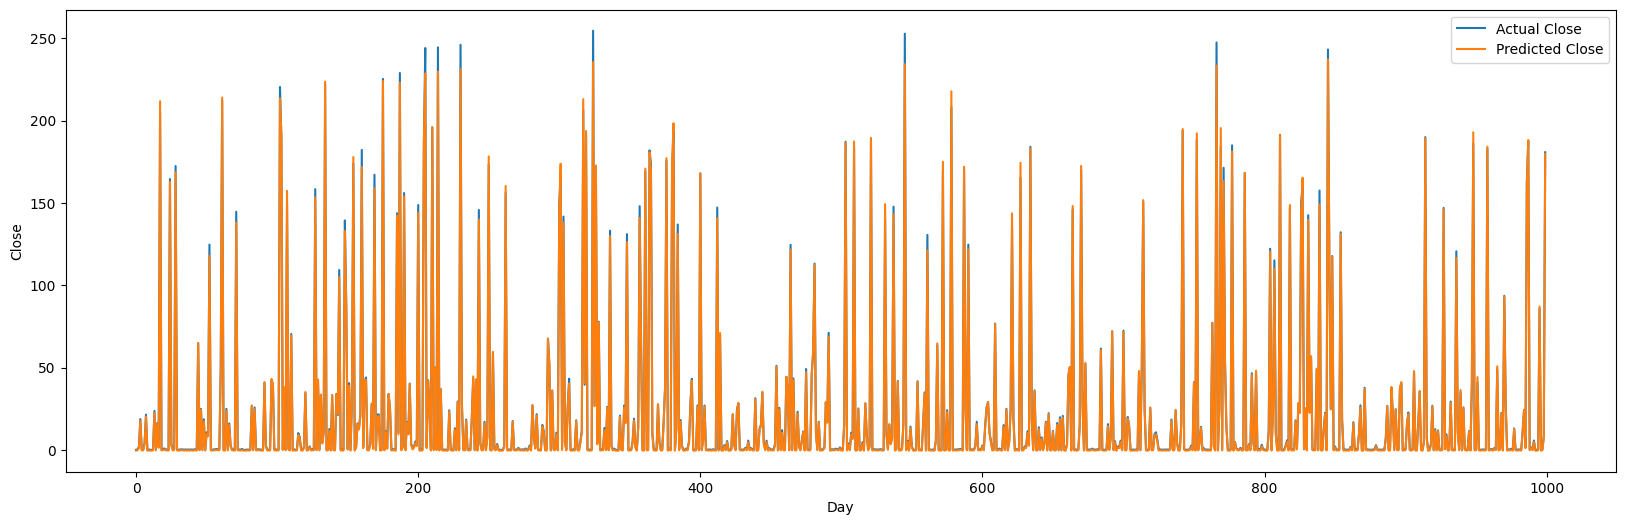

In [57]:
plt.figure(figsize=(20,6))
plt.plot(new_y_train[:1000], label='Actual Close')
plt.plot(train_prediction[:1000], label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

Text(0, 0.5, 'Predictions Train')

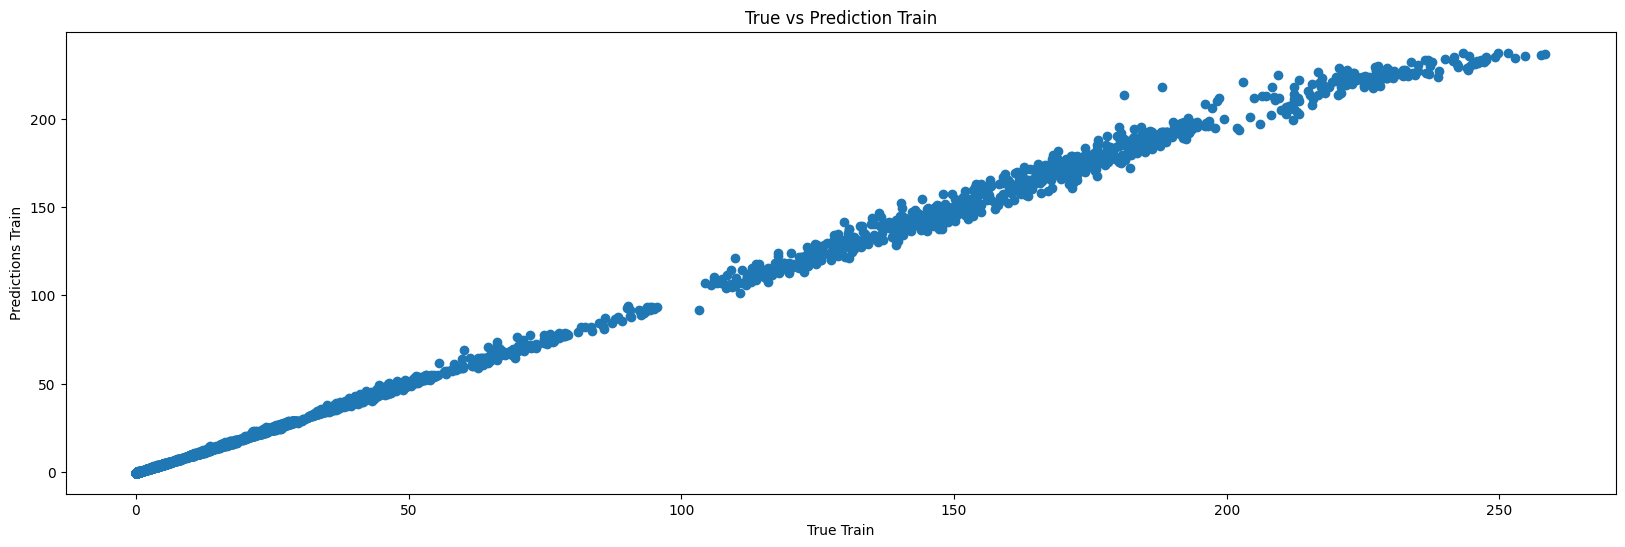

In [58]:
plt.figure(figsize=(20,6))
plt.scatter(new_y_train, train_prediction)
plt.title('True vs Prediction Train')
plt.xlabel('True Train')
plt.ylabel('Predictions Train')

In [59]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], 8))
dummies[:,0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = copy.deepcopy(dummies[:,0])
test_predictions

array([25.63136116, -0.33669695, 16.93638646, ..., -0.39481426,
       43.59352891, -0.17732863])

In [60]:
dummies = np.zeros((X_test.shape[0], 8))
dummies[:,0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = copy.deepcopy(dummies[:,0])
new_y_test

array([25.77794798,  0.14557354, 17.61114937, ...,  0.07930996,
       42.81895484,  0.32759437])

In [65]:
rmse = root_mean_squared_error(new_y_test, test_predictions)
mape = mean_absolute_percentage_error(new_y_test, test_predictions)
print(f"Test RMSE: {rmse:.2f}")
print(f'Test MAPE: {mape*100:.2f}')


Test RMSE: 2.04
Test MAPE: 159.27


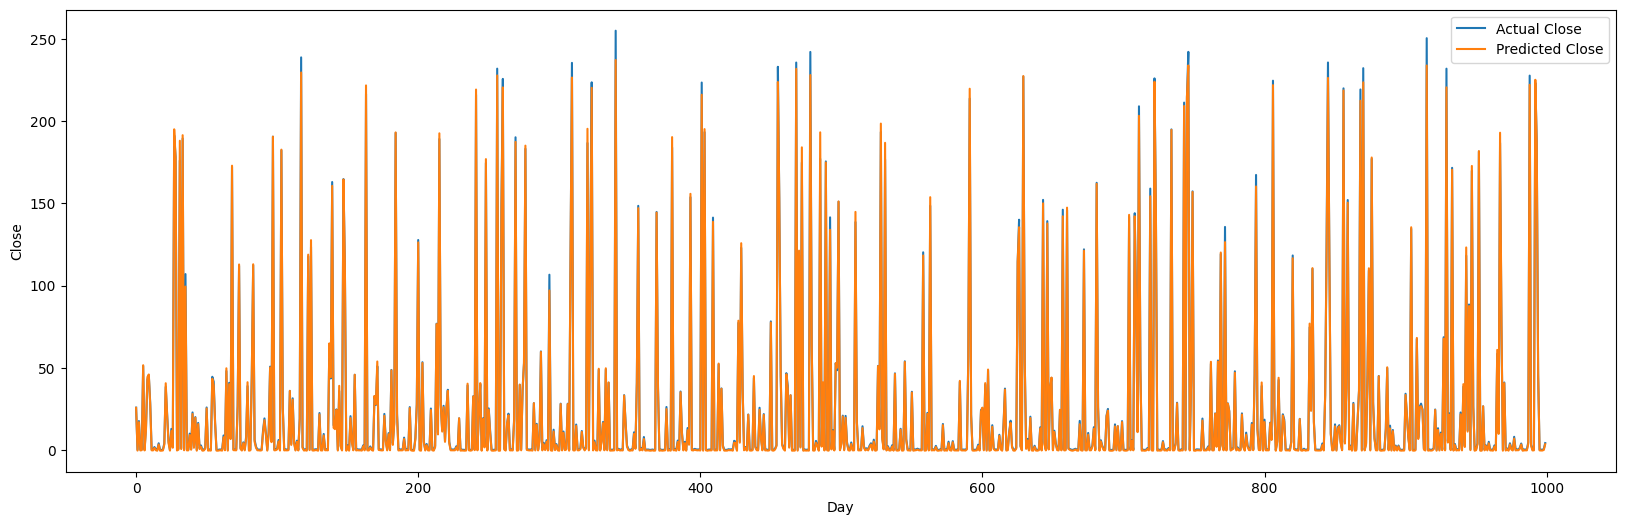

In [62]:
plt.figure(figsize=(20,6))
plt.plot(new_y_test[:1000], label='Actual Close')
plt.plot(test_predictions[:1000], label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

Text(0, 0.5, 'Predictions Test')

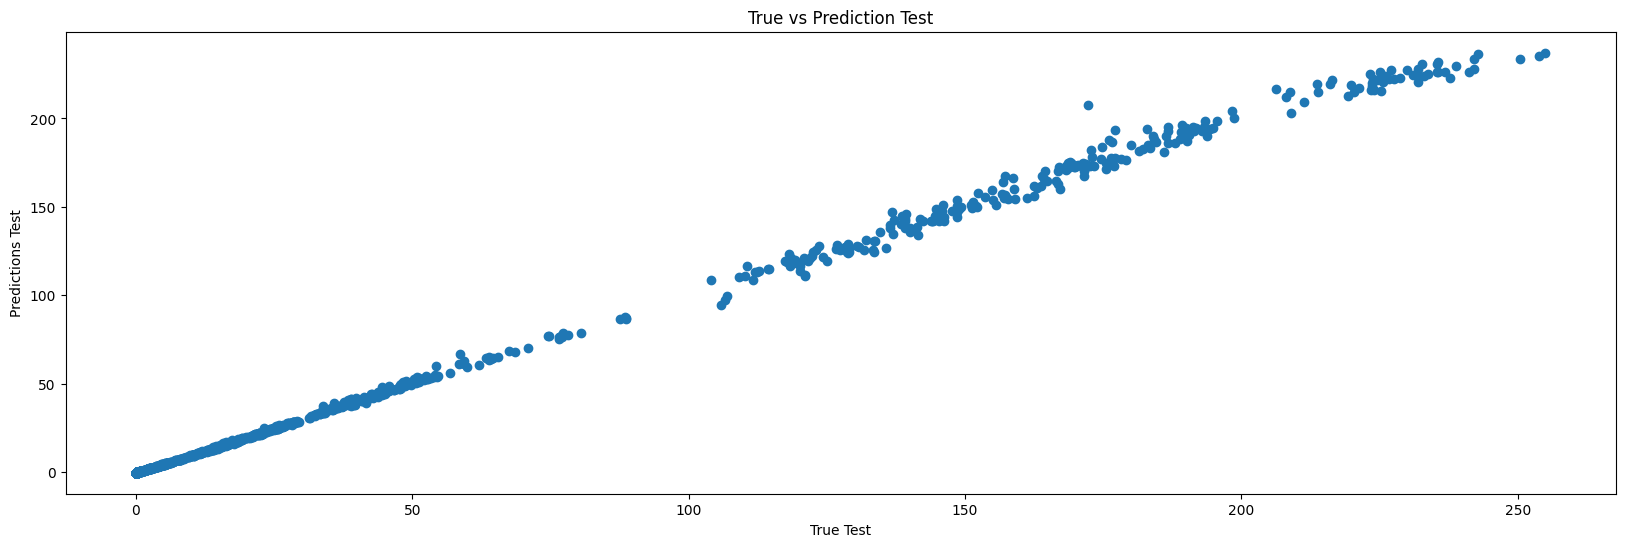

In [63]:
plt.figure(figsize=(20,6))
plt.scatter(new_y_test, test_predictions)
plt.title('True vs Prediction Test')
plt.xlabel('True Test')
plt.ylabel('Predictions Test')

In [ ]:
torch.save(model.state_dict(), f='project_api/model.pth')

In [ ]:
torch.save(scaler, f='project_api/scaler.pkl')